# Two-sample t test #

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Two-sample t test</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2022-03-25</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2017-10-10</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">two_sample_t.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">data_two_sample_t.csv</td>
    </tr>
</table>

# In brevi #

A two-sample t test answers these questions:

1. Is the average of a sample from process one different from the average of a sample from process two?
2. Is the average of a sample from process one greater than the average of a sample from process two?
3. Is the average of a sample from process one less than the average of a sample from process two?

# Contents #

- [Assumptions](#assumptions)
- [How to use this notebook](#how-to-use-this-notebook)
- [Quick-and-dirty](#quick-and-dirty)
- [Graphical analyses](#graphical-analyses)
- [Descriptive statistics](#descriptive-statistics)
- [Hypothesis test method](#hypothesis-test-method)
- [Confidence interval method](#confidence-interval-method)
- [References](#references)
- [Support](#support)

# <a id='assumptions'></a> Assumptions #

- The data are continuous ([interval](https://en.wikipedia.org/wiki/Level_of_measurement#Interval_scale) or [ratio](https://en.wikipedia.org/wiki/Level_of_measurement#Ratio_scale) scales).
- The data in each sample follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $\mu$ and variance $\sigma^2$.
- The sample variances $s^2$ follow a $\chi^2$ distribution with $\rho$ degrees of freedom under the null hypothesis, where $\rho$ is a positive constant.
- $(\overline{Y} - \mu)$ and the sample standard deviations $s$ are independent.
- The size of each sample may be equal or unequal.
- The variance of each sample may be equal or unequal.
- The data should be sampled independently from the two populations being compared.

# <a id='how-to-use-this-notebook'></a> How to use this notebook #

1. Edit the test parameters.
2. Create a data file.
3. Recalculate all cells.

In [1]:
from typing import IO, List, NoReturn, Tuple, Union
from pathlib import Path

In [2]:
%config InlineBackend.figure_format = 'svg'
from matplotlib.offsetbox import AnchoredText
import statsmodels.stats.diagnostic as smd
from IPython.display import display_html
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.cm as cm
import datasense as ds
import pandas as pd
import numpy as np
%matplotlib inline

/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


## Edit the test parameters ##

Change the following parameter to suit your analysis:

- hypothesized_difference
- signficance_level

In [3]:
hypothesized_difference = 4
significance_level = 0.05

# Other parameters

In [4]:
colour1, colour2 = "#0077bb", "#33bbee"

## Create the DataFrames

In [5]:
data = {
    'x': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'y': [
        32, 37, 35, 28, 41, 44, 35, 31, 34, 38, 42, 36, 31, 30, 31, 34,
        36, 29, 32, 31
    ]
}
df = pd.DataFrame(data=data)
sample_one = df[df['x'] == 1]
sample_two = df[df['x'] == 2]

# <a id='descriptive-statistics'></a> Descriptive statistics #

## Sample one ##

In [6]:
n_sample_one = sample_one["y"].count()
average_sample_one = sample_one["y"].mean()
median_sample_one = sample_one['y'].median()
standard_deviation_sample_one = sample_one["y"].std(ddof=1)
variance_sample_one = sample_one["y"].var(ddof=1)
standard_error_mean_sample_one = \
    standard_deviation_sample_one/np.sqrt(n_sample_one)
min_sample_one = sample_one["y"].min()
max_sample_one = sample_one["y"].max()
first_quartile_sample_one = sample_one["y"].quantile(q=0.25)
third_quartile_sample_one = sample_one["y"].quantile(q=0.75)
interquartile_range_sample_one = \
    third_quartile_sample_one - first_quartile_sample_one
print(f"Count                     : {n_sample_one:7.3f}")
print(f"Average                   : {average_sample_one:7.3f}")
print(f"Median                    : {median_sample_one:7.3f}")
print(f"Sample standard deviation : {standard_deviation_sample_one:7.3f}")
print(f"Variance                  : {variance_sample_one:7.3f}")
print(f"Standard error of the mean: {standard_error_mean_sample_one:7.3f}")
print(f"Minimum                   : {min_sample_one:7.3f}")
print(f"Maximum                   : {max_sample_one:7.3f}")
print(f"First quartile            : {first_quartile_sample_one:7.3f}")
print(f"Third quartile            : {third_quartile_sample_one:7.3f}")
print(f"Interquartile range       : {interquartile_range_sample_one:7.3f}")

Count                     :  11.000
Average                   :  36.091
Median                    :  35.000
Sample standard deviation :   4.908
Variance                  :  24.091
Standard error of the mean:   1.480
Minimum                   :  28.000
Maximum                   :  44.000
First quartile            :  33.000
Third quartile            :  39.500
Interquartile range       :   6.500


## Sample two ##

In [7]:
n_sample_two = sample_two["y"].count()
average_sample_two = sample_two["y"].mean()
median_sample_two = sample_two['y'].median()
standard_deviation_sample_two = sample_two["y"].std(ddof=1)
variance_sample_two = sample_two["y"].var(ddof=1)
standard_error_mean_sample_two = \
    standard_deviation_sample_two/np.sqrt(n_sample_two)
min_sample_two = sample_two["y"].min()
max_sample_two = sample_two["y"].max()
first_quartile_sample_two = sample_two["y"].quantile(q=0.25)
third_quartile_sample_two = sample_two["y"].quantile(q=0.75)
interquartile_range_sample_two = \
    third_quartile_sample_two - first_quartile_sample_two
print(f"Count                     : {n_sample_two:7.3f}")
print(f"Average                   : {average_sample_two:7.3f}")
print(f"Median                    : {median_sample_two:7.3f}")
print(f"Sample standard deviation : {standard_deviation_sample_two:7.3f}")
print(f"Variance                  : {variance_sample_two:7.3f}")
print(f"Standard error of the mean: {standard_error_mean_sample_two:7.3f}")
print(f"Minimum                   : {min_sample_two:7.3f}")
print(f"Maximum                   : {max_sample_two:7.3f}")
print(f"First quartile            : {first_quartile_sample_two:7.3f}")
print(f"Third quartile            : {third_quartile_sample_two:7.3f}")
print(f"Interquartile range       : {interquartile_range_sample_two:7.3f}")

Count                     :   9.000
Average                   :  32.222
Median                    :  31.000
Sample standard deviation :   2.539
Variance                  :   6.444
Standard error of the mean:   0.846
Minimum                   :  29.000
Maximum                   :  36.000
First quartile            :  31.000
Third quartile            :  34.000
Interquartile range       :   3.000


# <a id='quick-and-dirty'></a> Quick-and-dirty #

Here is the minimal code to do a two-sample t test.

## Scenario one

Is the average of a sample from process one different from the average of a sample from process two?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process one equals the average of process two<br />
H<sub>a</sub>: $\mu_1$ ≠ $\mu_2$ The average of process one does not equal the average of process two.<br />

### Equal variances ###

In [8]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=True, alternative="two-sided"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

statistically significant
test statistic:   2.135
p value       :   0.047


### Unequal variances ###

In [9]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=False, alternative="two-sided"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

statistically significant
test statistic:   2.269
p value       :   0.038


## Scenario two

Is the average of a sample from process one greater than the average of a sample from process two?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process one equals the average of process two.<br />
H<sub>a</sub>: $\mu_1$ > $\mu_2$ The average of process one is greater than the average of process two.<br />

### Equal variances ###

In [10]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=True, alternative="less"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

not statistically significant
test statistic:   2.135
p value       :   0.977


### Unequal variances ###

In [11]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=False, alternative="less"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

not statistically significant
test statistic:   2.269
p value       :   0.981


## Scenario 3

Is the average of a sample from process one less than the average of a sample from process two?

H<sub>o</sub>: $\mu_1$ = $\mu_2$ The average of process one equals the average of process two.<br />
H<sub>a</sub>: $\mu_1$ < $\mu_2$ The average of process one is greater than the average of process two.<br />

### Equal variances ###

In [12]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=True, alternative="greater"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

statistically significant
test statistic:   2.135
p value       :   0.023


### Unequal variances ###

In [13]:
test_result = stats.ttest_ind(
    a=sample_one["y"], b=sample_two["y"],
    equal_var=False, alternative="greater"
)
if test_result.pvalue < significance_level:
    print("statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")
else:
    print("not statistically significant")
    print(f"test statistic: {test_result.statistic:7.3f}")
    print(f"p value       : {test_result.pvalue:7.3f}")

statistically significant
test statistic:   2.269
p value       :   0.019


# <a id='graphical-analyses'></a> Graphical analyses #

## Histogram ##

In [14]:
# c = cm.Paired.colors
# c[0] c[1] ... c[11]
# See "paired" in "qualitative colormaps"
# https://matplotlib.org/tutorials/colors/colormaps.html

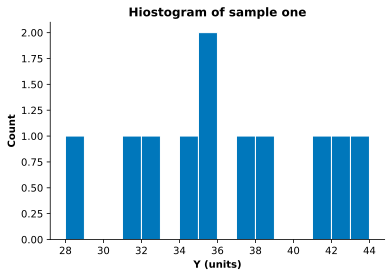

In [15]:
fig, ax = ds.plot_histogram(
    series=sample_one["y"], number_bins=16, bin_range=(28, 44), bin_width=1
)
ax.set_xlabel("Y (units)", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")
ax.set_title(label="Hiostogram of sample one", fontweight="bold")
ds.despine(ax=ax)

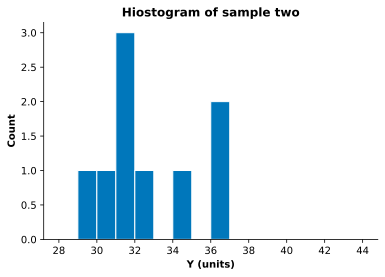

In [16]:
fig, ax = ds.plot_histogram(
    series=sample_two["y"], number_bins=16, bin_range=(28, 44), bin_width=1
)
ax.set_xlabel("Y (units)", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")
ax.set_title(label="Hiostogram of sample two", fontweight="bold")
ds.despine(ax=ax)

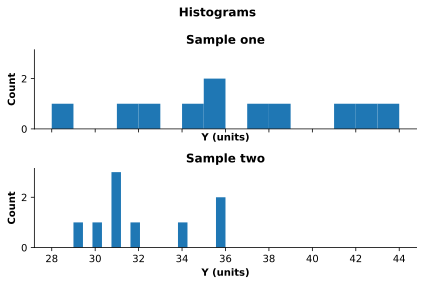

In [17]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True, sharey=True, layout='tight'
)
mid = (fig.subplotpars.right + fig.subplotpars.left) / 2
fig.suptitle(t="Histograms", fontweight="bold", x=mid)
ax1.hist(x=sample_one["y"], bins=16)
ax1.set_title(label="Sample one", fontweight="bold")
ax1.set_ylabel("Count", fontweight="bold")
ax1.set_xlabel("Y (units)", fontweight="bold")
ax2.hist(x=sample_two["y"], bins=16)
ax2.set_title(label="Sample two", fontweight="bold")
ax2.set_ylabel("Count", fontweight="bold")
ax2.set_xlabel("Y (units)", fontweight="bold")
ds.despine(ax=ax1)
ds.despine(ax=ax2)

## Box and whisker plot ##

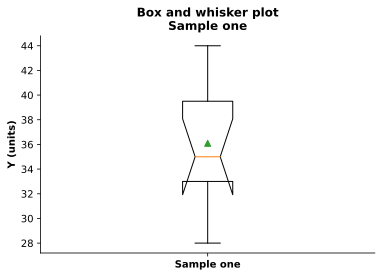

In [18]:
fig, ax = ds.plot_boxplot(
    series=sample_one["y"],
    notch=True,
    showmeans=True
)
ax.set_title(label="Box and whisker plot\nSample one", fontweight="bold")
ax.set_xticks(ticks=[1], labels=["Sample one"], fontweight="bold")
ax.set_ylabel("Y (units)", fontweight="bold")
ds.despine(ax=ax)

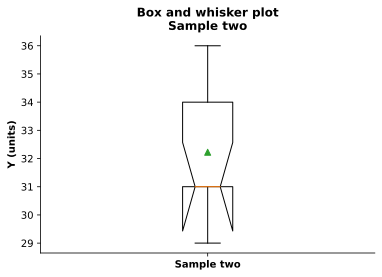

In [19]:
fig, ax = ds.plot_boxplot(
    series=sample_two["y"],
    notch=True,
    showmeans=True
)
ax.set_title(label="Box and whisker plot\nSample two", fontweight="bold")
ax.set_xticks(ticks=[1], labels=["Sample two"], fontweight="bold")
ax.set_ylabel("Y (units)", fontweight="bold")
ds.despine(ax=ax)

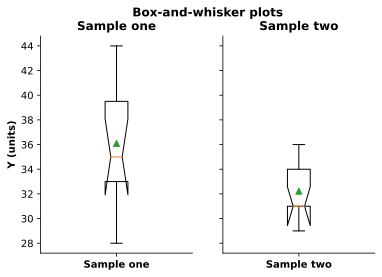

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1.boxplot(
    x=sample_one["y"],
    notch=True,
    showmeans=True
)
ax2.boxplot(
    x=sample_two["y"],
    notch=True,
    showmeans=True
)
ax1.set_xticks(ticks=[1], labels=["Sample one"], fontweight="bold")
ax2.set_xticks(ticks=[1], labels=["Sample two"], fontweight="bold")
ax1.set_title(label="Sample one", fontweight="bold")
ax2.set_title(label="Sample two", fontweight="bold")
ax1.set_ylabel("Y (units)", fontweight="bold")
mid = (fig.subplotpars.right + fig.subplotpars.left) / 2
fig.suptitle(
    t="Box-and-whisker plots", fontweight="bold", x=mid
)
ds.despine(ax=ax1)
ds.despine(ax=ax2)

## Scatter plot ##

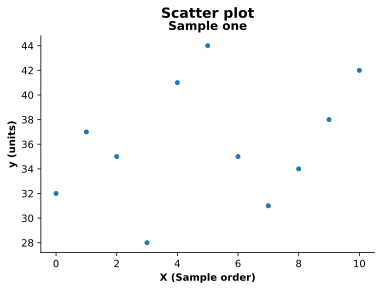

In [21]:
# create Figure, Axes objects
fig, ax = plt.subplots(nrows=1, ncols=1)
# remove two spines
for spine in 'right', 'top':
    ax.spines[spine].set_visible(False)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.plot(
    sample_one['y'],
    linestyle='None',
    marker='.',
    markersize=8
)
# mid point of left and right x-positions
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
# add Figure title
fig.suptitle(t="Scatter plot", fontweight='bold', x=mid, fontsize=14)
# add Axes title
ax.set_title(label="Sample one", fontweight='bold', fontsize=12)
# add y axis title
ax.set_ylabel(ylabel="y (units)", fontweight='bold', fontsize=10)
# add x axis title
ax.set_xlabel(xlabel="X (Sample order)", fontweight='bold', fontsize=10)
fig.savefig(fname="fig_ax_scatter_ex_02.svg", format="svg")

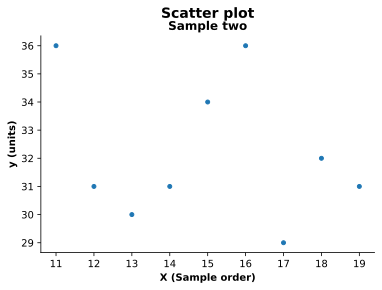

In [22]:
# create Figure, Axes objects
fig, ax = plt.subplots(nrows=1, ncols=1)
# remove two spines
for spine in 'right', 'top':
    ax.spines[spine].set_visible(False)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax.plot(
    sample_two['y'],
    linestyle='None',
    marker='.',
    markersize=8
)
# mid point of left and right x-positions
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
# add Figure title
fig.suptitle(t="Scatter plot", fontweight='bold', x=mid, fontsize=14)
# add Axes title
ax.set_title(label="Sample two", fontweight='bold', fontsize=12)
# add y axis title
ax.set_ylabel(ylabel="y (units)", fontweight='bold', fontsize=10)
# add x axis title
ax.set_xlabel(xlabel="X (Sample order)", fontweight='bold', fontsize=10)
fig.savefig(fname="fig_ax_scatter_ex_02.svg", format="svg")

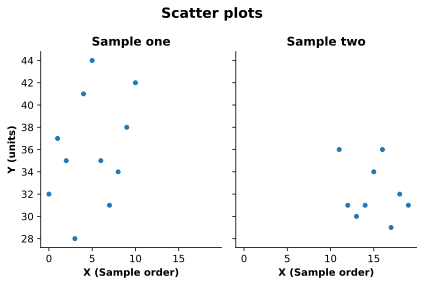

In [23]:
# create Figure, Axes objects
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, sharex=True, sharey=True, layout='tight'
)
# remove two spines
for spine in 'right', 'top':
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
# add Figure title
fig.suptitle(t='Scatter plots', fontweight='bold', fontsize=14)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
ax1.plot(sample_one['y'], marker='.', markersize=8, linestyle='None')
# add Axes title
ax1.set_title(label='Sample one', fontweight='bold', fontsize=12)
# add y axis title
ax1.set_ylabel(ylabel='Y (units)', fontweight='bold')
# add x axis title
ax1.set_xlabel(xlabel='X (Sample order)', fontweight='bold', fontsize=10)
ax2.plot(sample_two['y'], marker='.', markersize=8, linestyle='None')
ax2.set_xlabel(xlabel='X (Sample order)', fontweight='bold', fontsize=10)
ax2.set_title(label='Sample two', fontweight='bold', fontsize=12)
# save image as file
fig.savefig(fname="fig_ax_scatter_ex_03.svg", format="svg")

## Normal probability plot ##

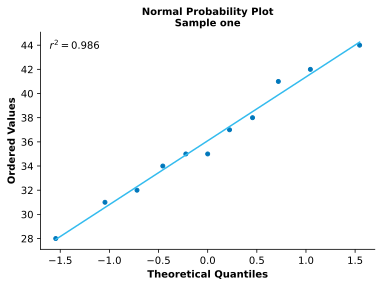

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)
(osm, osr), (slope, intercept, r) = stats.probplot(
    x=sample_one["y"], dist="norm", fit=True, plot=ax
)
ds.despine(ax=ax)
r_squared = r * r
equation = f"$r^2 = {r_squared:.3f}$"
ax.get_lines()[0].set(color=colour1, markersize=4)
ax.get_lines()[1].set(color=colour2)
ax.set_title(
    label="Normal Probability Plot\nSample one",
    fontweight="bold", fontsize=10
)
ax.set_xlabel(xlabel="Theoretical Quantiles", fontweight="bold")
ax.yaxis.get_label().set(fontweight="bold")
text = AnchoredText(s=equation, loc='upper left', frameon=False)
ax.add_artist(a=text)
fig.savefig(fname="normal_probability_plot_sample_one.svg", format="svg")

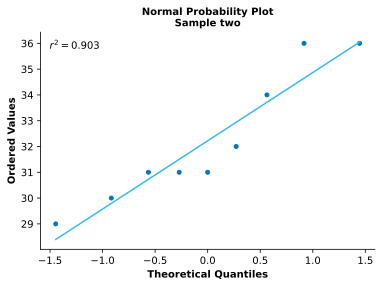

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)
(osm, osr), (slope, intercept, r) = stats.probplot(
    x=sample_two["y"], dist="norm", fit=True, plot=ax
)
ds.despine(ax=ax)
r_squared = r * r
equation = f"$r^2 = {r_squared:.3f}$"
ax.get_lines()[0].set(color=colour1, markersize=4)
ax.get_lines()[1].set(color=colour2)
ax.set_title(
    label="Normal Probability Plot\nSample two",
    fontweight="bold", fontsize=10
)
ax.set_xlabel(xlabel="Theoretical Quantiles", fontweight="bold")
ax.set_ylabel(ylabel="Ordered Values", fontweight="bold")
text = AnchoredText(s=equation, loc='upper left', frameon=False)
ax.add_artist(a=text)
fig.savefig(fname="normal_probability_plot_sample_two.svg", format="svg")

## Test for equal variances ##

### F test

If there are only two samples, the F test can be used.

#### Using scipy.stats ####

In [26]:
f_calculated = variance_sample_one / variance_sample_two
p_value = stats.f.sf(f_calculated, n_sample_one - 1,
                     n_sample_two - 1) * 2
f_critical_low = stats.f.ppf(significance_level / 2,
                             n_sample_one, n_sample_two)
f_critical_high = stats.f.ppf(1 - significance_level / 2,
                              n_sample_one, n_sample_two)

display_html('H<sub>o</sub>: $\sigma^2_1$ = $\sigma^2_2$',
             'H<sub>a</sub>: $\sigma^2_1$ ≠ $\sigma^2_2$',
             'Variance of sample 1 = ' + str(variance_sample_one.
                                             round(3)),
             'Variance of sample 2 = ' + str(variance_sample_two.
                                             round(3)),
             'F<sub>calculated</sub> = ' + str(f_calculated.
                                               round(3)),
             'F<sub>critical low</sub> = ' + str(f_critical_low.
                                                 round(3)),
             'F<sub>critical high</sub> = ' + str(f_critical_high.
                                                  round(3)),
             'p value for F<sub>calculated</sub> = ' + str(p_value.
                                                           round(3)),
             raw=True)

if (f_critical_low < f_calculated < f_critical_high):
    display_html('F<sub>critical low</sub> &lt; ' + 
                 'F<sub>calculated</sub> &lt; ' +
                 'F<sub>critical high</sub>' + ' (' +
                 str(f_critical_low.round(3)) + ' &lt; ' +
                 str(f_calculated.round(3)) + ' &lt; ' +
                 str(f_critical_high.round(3)) + ') ' + 
                 'at the 0.05 significance level. The two samples '\
                 'probably have equal variances.', raw=True)
elif f_calculated < f_critical_low:
    display_html('F<sub>calculated</sub> &lt; ' +
                 'F<sub>critical low</sub>' + ' (' +
                 str(f_calculated.round(3)) + ' &lt; ' +
                 str(f_critical_low.round(3)) + ') ' +
                 ' at the 0.05 significance level. The two samples '\
                 'probably do not have equal variances.', raw=True)
elif f_calculated > f_critical_high:
    display_html('F<sub>calculated</sub> &gt; ' +
                 'F<sub>critical high</sub>' + ' (' +
                 str(f_calculated.round(3)) + ' &gt; ' +
                 str(f_critical_high.round(3)) + ') ' +
                 ' at the 0.05 significance level. The two samples '\
                 'probably do not have equal variances.', raw=True)

H o : $\sigma^2_1$ = $\sigma^2_2$

H a : $\sigma^2_1$ ≠ $\sigma^2_2$

Variance of sample 1 = 24.091

Variance of sample 2 = 6.444

F calculated = 3.738

F critical low = 0.279

F critical high = 3.912

p value for F calculated = 0.074

F critical low < F calculated < F critical high (0.279 < 3.738 < 3.912) at the 0.05 significance level. The two samples probably have equal variances.

#### Using long method ####

See [F test for equality of two variances](http://www.itl.nist.gov/div898/handbook/eda/section3/eda359.htm).

### Bartlett's test ###

#### Using scipy.stats ####

In [27]:
T_calculated, p_value = stats.bartlett(sample_one['y'],
                                       sample_two['y'])
# where k = no. samples, k - 1
chi_square_critical = stats.chi2.ppf(1 - significance_level, 2 - 1)

display_html('H<sub>o</sub>: $\sigma^2_1$ = $\sigma^2_2$',
             'H<sub>a</sub>: $\sigma^2_1$ ≠ $\sigma^2_2$',
             'Variance of sample 1 = ' + str(variance_sample_one.
                                             round(3)),
             'Variance of sample 2 = ' + str(variance_sample_two.
                                             round(3)),
             'T<sub>calculated</sub> = ' + str(T_calculated.
                                               round(3)),
             '${\chi}^2$ = ' + str(chi_square_critical.
                                   round(3)),
             'p value for T<sub>calculated</sub> = ' + str(p_value.
                                                           round(3)),
             raw=True)

if T_calculated > chi_square_critical:
    display_html('The T test statistic = ' +
                 str(T_calculated.round(3)) +
                 ' and is > the critical value = ' +
                 str(chi_square_critical.round(3)) +
                 ' at the 0.05 significance level. The two samples '\
                 'probably do not have equal variances.', raw=True)
else:
    display_html('The T test statistic = ' +
                 str(T_calculated.round(3)) +
                 ' and is &le; the critical value = ' +
                 str(chi_square_critical.round(3)) +
                 ' at the 0.05 significance level. The two samples '\
                 'probably have equal variances.', raw=True)

H o : $\sigma^2_1$ = $\sigma^2_2$

H a : $\sigma^2_1$ ≠ $\sigma^2_2$

Variance of sample 1 = 24.091

Variance of sample 2 = 6.444

T calculated = 3.274

${\chi}^2$ = 3.841

p value for T calculated = 0.07

The T test statistic = 3.274 and is ≤ the critical value = 3.841 at the 0.05 significance level. The two samples probably have equal variances.

#### Using long method ####

See [Bartlett's test](http://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm).

### Levene's test ###

#### Using scipy.stats ####

In [28]:
w_calculated, p_value = stats.levene(sample_one['y'], sample_two['y'])
w_critical = stats.f.ppf(1- significance_level, 2, n_sample_one + n_sample_two)

display_html('H<sub>o</sub>: $\sigma^2_1$ = $\sigma^2_2$',
             'H<sub>a</sub>: $\sigma^2_1$ ≠ $\sigma^2_2$',
             'Variance of sample 1 = ' + str(variance_sample_one.
                                             round(3)),
             'Variance of sample 2 = ' + str(variance_sample_two.
                                             round(3)),
             'W<sub>calculated</sub> = ' + str(w_calculated.
                                               round(3)),
             'W<sub>critical</sub> = ' + str(w_critical.round(3)),
             'p value for W<sub>calculated</sub> = ' + str(p_value.
                                                           round(3)),
             raw=True)

if w_calculated > w_critical:
    display_html('The W test statistic = ' +
                 str(w_calculated.round(3)) +
                 ' and is > the critical value = ' +
                 str(w_critical.round(3)) +
                 ' at the 0.05 significance level. The two samples '\
                 'probably do not have equal variances.', raw=True)
else:
    display_html('The W test statistic = ' +
                 str(w_calculated.round(3)) +
                 ' and is &le; the critical value = ' +
                 str(w_critical.round(3)) +
                 ' at the 0.05 significance level. The two samples '\
                 'probably have equal variances.', raw=True)

H o : $\sigma^2_1$ = $\sigma^2_2$

H a : $\sigma^2_1$ ≠ $\sigma^2_2$

Variance of sample 1 = 24.091

Variance of sample 2 = 6.444

W calculated = 2.621

W critical = 3.493

p value for W calculated = 0.123

The W test statistic = 2.621 and is ≤ the critical value = 3.493 at the 0.05 significance level. The two samples probably have equal variances.

#### Using long method ####

See [Levene test for equality of variances](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm).

## Lack-of-fit tests ##

### Anderson-Darling  for sample one ###

In [29]:
adresult = stats.anderson(sample_one['y'], dist='norm')

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic '\
             'is &gt; the '
             'critical value.'
             , raw=True)

if adresult.statistic > adresult.critical_values[2]:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is > the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are '\
                 'probably not normally distributed.', raw=True)
else:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is &le; the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are '\
                 'probably normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is > the critical value.

The Anderson-Darling test statistic = 0.153 and is ≤ the critical value = 0.68 at the 0.05 significance level. The data are probably normally distributed.

#### Using long method ####

See [Anderson-Darling and Shapiro-Wilk tests](http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm).

### Shapiro-Wilk  for sample one ###

#### Using scipy.stats ####

In [30]:
swresult = stats.shapiro(sample_one['y'])

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic '\
             'is &gt; the critical value.'
             , raw=True)

if swresult[1] < significance_level:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore statistically significant ' +
                 'at the 0.05 significance level. The data are '\
                 'probably not normally distributed.', raw=True)
else:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore not statistically significant ' +
                 'at the 0.05 significance level. The data are '\
                 'probably normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is > the critical value.

The Shapiro-Wilk test statistic = 0.979 has a p value = 0.957 and is therefore not statistically significant at the 0.05 significance level. The data are probably normally distributed.

#### Using long method ####

See [Anderson-Darling and Shapiro-Wilk tests](http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm).

### Anderson-Darling for sample two ###

#### Using scipy.stats ####

In [31]:
adresult = stats.anderson(sample_two['y'], dist='norm')

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic '\
             'is &gt; the '
             'critical value.'
             , raw=True)

if adresult.statistic > adresult.critical_values[2]:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is > the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are '\
                 'probably not normally distributed.', raw=True)
else:
    display_html('The Anderson-Darling test statistic = ' +
                 str(adresult.statistic.round(3)) +
                 ' and is &le; the critical value = ' +
                 str(adresult.critical_values[2].round(3)) +
                 ' at the 0.05 significance level. The data are '\
                 'probably normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is > the critical value.

The Anderson-Darling test statistic = 0.499 and is ≤ the critical value = 0.693 at the 0.05 significance level. The data are probably normally distributed.

#### Using long method ####

See [Anderson-Darling and Shapiro-Wilk tests](http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm).

### Shapiro-Wilk for sample two ###

#### Using scipy.stats ####

In [32]:
swresult = stats.shapiro(sample_two['y'])

display_html('H<sub>o</sub>: lack-of-fit = 0' + '<br />' +
             'H<sub>a</sub>: lack-of-fit ≠ 0' + '<br />' +
             'Reject H<sub>o</sub> if the calculated test statistic '\
             'is &gt; the critical value.'
             , raw=True)

if swresult[1] < significance_level:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore statistically significant ' +
                 'at the 0.05 significance level. The data are '\
                 'probably not normally distributed.', raw=True)
else:
    display_html('The Shapiro-Wilk test statistic = ' +
                 str(round(swresult[0], 3)) +
                 ' has a p value = ' +
                 str(round(swresult[1], 3)) +
                 ' and is therefore not statistically significant ' +
                 'at the 0.05 significance level. The data are '\
                 'probably normally distributed.', raw=True)

H o : lack-of-fit = 0 H a : lack-of-fit ≠ 0 Reject H o if the calculated test statistic is > the critical value.

The Shapiro-Wilk test statistic = 0.885 has a p value = 0.178 and is therefore not statistically significant at the 0.05 significance level. The data are probably normally distributed.

#### Using long method ####

See [Anderson-Darling and Shapiro-Wilk tests](http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm).

# <a id='hypothesis-test-method'></a> Hypothesis test method #

The two-sample t test (Snedecor and Cochran 1989) is used to determine if two sample averages are different.

**Example**. Is the average of a new supplier different from the current supplier?

To test whether the average of one sample is different from another sample.

H<sub>o</sub>: $\overline{y}_1$ = $\overline{y}_2$<br />
H<sub>a</sub>: $\overline{y}_1$ ≠ $\overline{y}_2$<br />

## Variances of each sample are assumed to be equal ##

The calculated value is defined as:

$$
\begin{aligned}
    t_\text{calculated} & = \frac{\overline{y}_1-\overline{y}_2}
        {s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \\
    s_p & = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}} \\
\end{aligned}
$$

The critical value is defined as:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, \nu} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $\nu$ degrees of freedom} \\
    \nu                & = n_1 + n_2 - 2 \\
\end{align*}
$$

Reject H<sub>o</sub> if |t<sub>calculated</sub>| > t<sub>critical</sub>.

In [33]:
# assumes equal variances
delta_one_two = average_sample_one - average_sample_two
va = variance_sample_one / n_sample_one
vb = variance_sample_two / n_sample_two
vc = n_sample_one + n_sample_two - 2
ve = np.sqrt(1 / n_sample_one + 1 / n_sample_two)
t_critical_equal = stats.t.isf(significance_level / 2, vc)
standard_deviation_pooled = np.sqrt(((n_sample_one - 1) *
                                     variance_sample_one + 
                                     (n_sample_two - 1) *
                                     variance_sample_two) / vc)
t_calculated_equal = (average_sample_one - average_sample_two) / \
                     (standard_deviation_pooled * ve)
p_value = stats.t.sf(np.abs(t_calculated_equal), vc) * 2
display_html('H<sub>o</sub>: average of sample 1 = '\
             'average of sample 2' + '<br />' +
             'H<sub>a</sub>: average of sample 1 ≠ '\
             'average of sample 2' + '<br />' +
             'average of sample 1 = ' + 
             str(average_sample_one.round(3)) + '<br />' +
             'average of sample 2 = ' + 
             str(average_sample_two.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' + 
             str(t_calculated_equal.round(3)) + '<br />' +
             't<sub>critical</sub> = ' + 
             str(t_critical_equal.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + 
             str(p_value.round(3)), raw=True)
if abs(t_calculated_equal) > t_critical_equal:
    display_html('The average of sample 1 is ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | > '\
                 't<sub>critical</sub> .', raw=True)
else:
    display_html('The average of sample 1 is not ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | < '\
                 't<sub>critical</sub> .', raw=True)

H o : average of sample 1 = average of sample 2 H a : average of sample 1 ≠ average of sample 2 average of sample 1 = 36.091 average of sample 2 = 32.222 t calculated = 2.135 t critical = 2.101 p value for t calculated = 0.047

The average of sample 1 is statistically, significantly different from the average of sample 2, because | t calculated | > t critical .

## Variances of each sample are assumed to be unequal ##

The calculated value is defined as:

$$
\begin{aligned}
    t_\text{calculated} = \frac{\overline{y}_1-\overline{y}_2}
        {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}} \\
\end{aligned}
$$

The critical value is defined as:

$$
\begin{aligned}
    t_\text{critical} = t_{1- \alpha / 2 \, \text{,} \, \nu} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, \nu} & = \text{the $100(1-\alpha/2)$
        percentile of the t distribution with $\nu$ degrees of freedom} \\
    \nu                & = \frac{\left(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}\right)^2}
        {\frac{\left(\frac{s^2_1}{n_1}\right)^2}{n_1-1} + 
        \frac{\left(\frac{s^2_2}{n_2}\right)^2}{n_2-1}} \\
\end{align*}
$$

Reject H<sub>o</sub> if |t<sub>calculated</sub>| > t<sub>critical</sub>.

In [34]:
# assumes unequal variances
t_calculated_unequal = (average_sample_one - average_sample_two) / \
                        np.sqrt(variance_sample_one / n_sample_one + \
                                variance_sample_two / n_sample_two)
vd = np.square(va + vb) / (np.square(va) / (n_sample_one - 1) + \
                          (np.square(vb) / (n_sample_two - 1)))
t_critical_unequal = stats.t.isf(significance_level / 2, vd)
p_value = stats.t.sf(np.abs(t_calculated_unequal), vd) * 2
display_html('H<sub>o</sub>: average of sample 1 = '\
             'average of sample 2' + '<br />' +
             'H<sub>a</sub>: average of sample 1 ≠ '\
             'average of sample 2' + '<br />' +
             'average of sample 1 = ' + 
             str(average_sample_one.round(3)) + '<br />' +
             'average of sample 2 = ' + 
             str(average_sample_two.round(3)) + '<br />' +
             't<sub>calculated</sub> = ' + 
             str(t_calculated_unequal.round(3)) + '<br />' +
             't<sub>critical</sub> = ' + 
             str(t_critical_unequal.round(3)) + '<br />' +
             'p value for t<sub>calculated</sub> = ' + 
             str(p_value.round(3)), raw=True)
if abs(t_calculated_unequal) > t_critical_unequal:
    display_html('The average of sample 1 is ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | > '\
                 't<sub>critical</sub> .', raw=True)
else:
    display_html('The average of sample 1 is not ' +
                 'statistically, significantly different from ' +
                 'the average of sample 2, ' +
                 'because | t<sub>calculated</sub> | < '\
                 't<sub>critical</sub> .', raw=True)

H o : average of sample 1 = average of sample 2 H a : average of sample 1 ≠ average of sample 2 average of sample 1 = 36.091 average of sample 2 = 32.222 t calculated = 2.269 t critical = 2.125 p value for t calculated = 0.038

The average of sample 1 is statistically, significantly different from the average of sample 2, because | t calculated | > t critical .

# <a id='confidence-interval-method'></a> Confidence interval method #

For a given confidence interval of an average of a sample, if many samples are collected and the confidence interval is calculated for each sample, in the long run about 95 % of these intervals would contain the true average.

The two-sample t test (Snedecor and Cochran 1989) is used to determine if the difference between the averages of two samples is not equal to zero.

The hypotheses are:

H<sub>o</sub>: |$\overline{y}_1$ - $\overline{y}_2$| = 0<br />
H<sub>a</sub>: |$\overline{y}_1$ - $\overline{y}_2$| ≠ 0

## Variances are assumed to be equal  ##

### n<sub>1</sub> < 30 or n<sub>2</sub> < 30 ###

<span style="color:red">**EDITOR NOTE**. Is the above correct re n?</span>

The confidence limits are defined as:

$$
\begin{aligned}
    (\overline{y}_1 - \overline{y}_2) \pm t_{1- \alpha / 2 \, \text{,} \, \nu} \times
        s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}
$$

where:

$$
\begin{align*}
    s_p & = \text{the pooled standard deviation} \\
        & = \sqrt{\frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{n_1 + n_2 - 2}} \\
    n_1                & = \text{the number of observations in sample 1} \\
    n_2                & = \text{the number of observations in sample 2} \\
    \overline{y}_1     & = \text{the average of sample 1} \\
    \overline{y}_2     & = \text{the average of sample 2} \\
    s^2_1              & = \text{the variance of sample 1} \\
    s^2_2              & = \text{the variance of sample 2} \\
    t_{1- \alpha / 2 \, \text{,} \, n-1} & = \text{the $100(1-\alpha/2)$ percentile of the t distribution with $n-1$ degrees of freedom} \\
    \nu                         & = n_1 + n_2 - 2 \\
    \alpha                      & = \text{the desired significance level}
\end{align*}
$$

Reject H<sub>o</sub> if 0 is not within the confidence interval.

In [35]:
delta_one_two = average_sample_one - average_sample_two
va = variance_sample_one / n_sample_one
vb = variance_sample_two / n_sample_two
vc = n_sample_one + n_sample_two - 2
ve = np.sqrt(1 / n_sample_one + 1 / n_sample_two)
t_critical_equal = stats.t.isf(significance_level / 2, vc)
standard_deviation_pooled = np.sqrt(((n_sample_one - 1) * 
                                     variance_sample_one +
                                     (n_sample_two - 1) *
                                     variance_sample_two) / vc)

In [36]:
lower_limit = delta_one_two - t_critical_equal * \
              standard_deviation_pooled * ve
upper_limit = delta_one_two + t_critical_equal * \
              standard_deviation_pooled * ve
if 0 < lower_limit or 0 > upper_limit:
    display_html('The two averages are statistically, '\
                 'significantly different ' \
                 'because 0 is not contained within the '\
                 'confidence interval ' + \
                 '(' + str(lower_limit.round(3)) + ', ' + 
                 str(upper_limit.round(3)) + ')' \
                 ' of the difference ' + 
                 str(delta_one_two.round(3)) + '.', raw=True)
else:
    display_html('The two averages are not statistically, '\
                 'significantly different ' \
                 'because 0 is contained within the '\
                 'confidence interval ' + \
                 '(' + str(lower_limit.round(3)) + ', ' + 
                 str(upper_limit.round(3)) + ')' \
                 ' of the difference ' + 
                 str(delta_one_two.round(3)) + '.', raw=True)

The two averages are statistically, significantly different because 0 is not contained within the confidence interval (0.062, 7.675) of the difference 3.869.

## Variances are assumed to be unequal ##

<span style="color:red">**EDITOR NOTE**. Use the Welch-Satherthwaite approximation for the degrees of freedom</span>

# <a id='references'></a> References #

- [Snedecor, George W., and William G. Cochran. 1989. *Statistical Methods*. Eighth Edition. Iowa State University Press](http://www.amazon.com/Statistical-Methods-George-W-Snedecor/dp/0813815614)
- [Minitab. “Hospital comparison data.”](http://support.minitab.com/en-us/datasets/basic-statistics-data-sets/hospital-comparison-data/)
- [NIST. Engineering Statistics Handbook.](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)
- [Wikipedia. “Confidence interval.”](https://en.wikipedia.org/wiki/Confidence_interval)
- [Wikipedia. “Two-sample t-test”](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)
- [Wikipedia. “Normal probability plot.”](https://en.wikipedia.org/wiki/Normal_probability_plot)

# <a id='support'></a> Support #

## Python librairies ##

- [matplotlib](https://github.com/matplotlib/matplotlib)
- [numpy](https://github.com/numpy/numpy)
- [pandas](https://github.com/pydata/pandas)
- [scipy](https://github.com/scipy/scipy)
- [statsmodels](https://github.com/statsmodels/statsmodels)

## Enhancements ##

- Code to check the assumptions, for example, test for equal variances.
- Two-sample t test two-sided, confidence interval method, variances equal, n<sub>1</sub> > 30 and n<sub>2</sub> > 30, using:

$$
\begin{aligned}
    (\overline{y}_1 - \overline{y}_2) \pm z \times
        s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}
$$

- Two-sample t test two-sided, confidence interval method, variances unequal, n<sub>1</sub> < 30 or n<sub>2</sub> < 30, using:
- Two-sample t test two-sided, confidence interval method, variances unequal, n<sub>1</sub> > 30 and n<sub>2</sub> > 30, using:
- Add more description to the graphical analyses.
- Test for equal variances, F test, one tail.

## Data sets ##

These data sets were used to test this notebook. They can also be used as examples for further study.

- [Minitab. “Hospital comparison data.”](minitab_hospital_comparison.csv)
- [NIST. AUTO83B.DAT. “Miles per US gallon, US v. Japan, cars.”](nist_us_japan_car_mpg.csv)

# Colophon #

<a href="mailto:gillespilon13@gmail.com">Gilles Pilon</a>.